In [1]:
import pandas as pd
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
from scipy import stats

### Define os parâmetros de entrada para o Grupo 12

In [2]:
rep_cycle_hengelson = [7,2,7,7,7,2,2,5,6,5,6,5,6,1,6,4,3,4,3,4]
rep_cycle_tgs = [7,6,4,5,2,2,3,7,6,4,5,1,7,6,4,3,2,5,7,6]
rep_cycle_own = [7,6,4,5,7,2,6,5,4,7,2,6,3,4,1,5,7,2,6,3]

rep_cycle_full = 2*rep_cycle_hengelson

# Define o tempo de processamento de cada um dos produtos reais em cada estação
data = {0:[718, 723.5, 662.6, 701.7, 714.2, 748.3, 655.1],
        1:[591, 546.7, 540, 603.6, 522.7, 609.1, 580.3], 
        2:[741, 745.5, 699.7, 766.5, 753.3, 590.1, 714.8], 
        3:[769, 702.1, 644.6, 783.7, 756.3, 682.4, 730.2], 
        4:[748, 746.1, 709.5, 789.6, 648.1, 692.5, 730.9]}

dados = pd.DataFrame(data=data, index=[1,2,3,4,5,6,7])

In [98]:
dados

,0,1,2,3,4
1,718.0,591.0,741.0,769.0,748.0
2,723.5,546.7,745.5,702.1,746.1
3,662.6,540.0,699.7,644.6,709.5
4,701.7,603.6,766.5,783.7,789.6
5,714.2,522.7,753.3,756.3,648.1
6,748.3,609.1,590.1,682.4,692.5
7,655.1,580.3,714.8,730.2,730.9


In [99]:
dados.loc[6,3]

682.4

In [3]:
arrays = [range(len(rep_cycle_full)), ['Inicio', 'Fim']]
index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
df = pd.DataFrame(index=range(5), columns=index)

### Define a função que cálcula o Gannt para determinada sequência de produtos a serem produzidos

In [4]:
def gen_gannt(seq):
    
    rep_cycle_full = seq*2 # Calcula o Gannt para 2 repetições da sequência
    stations_list = range(5) # Define o número de estações
    
    # Cria o DataFrame com as linhas representando as estações e a colunas os produtos
    arrays = [range(len(rep_cycle_full)), ['Inicio', 'Fim']]
    index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
    df = pd.DataFrame(index=range(5), columns=index)
    
    for station in stations_list:
        if station == 0:
            # Na primeira estação não é necessário verificar a existência de desbalanceamentos com a linha anterior 
            for i,j in enumerate(rep_cycle_full):
                if i == 0:
                    df.loc[station, (i, 'Inicio')] = 0 # Primeira estação inicia o trabalho no momento 0
                    df.loc[station, (i, 'Fim')] = dados.loc[j, station] # Tempo de início de fabricação produto + tempo de processamento
                else:
                    df.loc[0, (i, 'Inicio')] = df.loc[0, (i-1, 'Fim')] # Tempo de início do produto n será o mesmo que o tempo de fim do produto n-1
                    df.loc[0, (i, 'Fim')] = df.loc[0, (i, 'Inicio')] + dados.loc[j, station] # Adiciona o tempo de processamento ao tempo de início do produto
        else:
            for i,j in enumerate(rep_cycle_full):
                if i == 0:
                    df.loc[station, (i, 'Inicio')] = df.loc[station-1, (i, 'Fim')]
                    df.loc[station, (i, 'Fim')] = df.loc[station, (i, 'Inicio')] + dados.loc[j, station]
                else:
                    # Só permite que o produto seja produziso na estação k se este já tiver sido produzido an estação k-1
                    df.loc[station, (i, 'Inicio')] = max([df.loc[station-1, (i, 'Fim')],df.loc[station, (i-1, 'Fim')]])
                    df.loc[station, (i, 'Fim')] = df.loc[station, (i, 'Inicio')] + dados.loc[j, station]

    return df

### Gera 1000 sequências aleatórias considerando as demandas de cada produto
Créditos: Grupo10

In [5]:
tarefasOrder = []
possibleNumbers = []

for i in range (0,1000):  
    partial_list = []
    l1 = 1
    l2 = 3
    l3 = 2
    l4 = 3
    l5 = 3
    l6 = 4
    l7 = 4
    nextNumber = ''
    for j in range (0,20):
        possibleNumbers = []
        if l1>=1:
            possibleNumbers.append(1)
        if l2>=1:
            possibleNumbers.append(2)
        if l3>=1:
            possibleNumbers.append(3)
        if l4>=1:
            possibleNumbers.append(4)
        if l5>=1:
            possibleNumbers.append(5)
        if l6>=1:
            possibleNumbers.append(6)
        if l7>=1:
            possibleNumbers.append(7)

        nextNumber = random.choice(possibleNumbers)

        if(nextNumber==1):
            l1=l1-1
        if(nextNumber==2):
            l2=l2-1
        if(nextNumber==3):
            l3=l3-1
        if(nextNumber==4):
            l4=l4-1
        if(nextNumber==5):
            l5=l5-1
        if(nextNumber==6):
            l6=l6-1
        if(nextNumber==7):
            l7=l7-1
        partial_list.append(nextNumber)
    tarefasOrder.append(partial_list)

#     print(tarefasOrder)
#     tarefasOrder.clear()

In [8]:
dic = {}
for i,j in enumerate(tarefasOrder):
    if i%10==0:    
        print(i)
    dic[i] = (gen_gannt(j),j)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


### Gannt gerado para uma das sequências aleatórias

In [9]:
dic[750][0]

Pos       0             1               2               3               4   \
state Inicio   Fim  Inicio     Fim  Inicio     Fim  Inicio     Fim  Inicio   
0          0   718     718  1466.3  1466.3  2121.4  2121.4    2784    2784   
1        718  1309  1466.3  2075.4  2121.4  2701.7    2784    3324  3485.7   
2       1309  2050  2075.4  2665.5  2701.7  3416.5  3416.5  4116.2  4116.2   
3       2050  2819    2819  3501.4  3501.4  4231.6  4231.6  4876.2  4882.7   
4       2819  3567    3567  4259.5  4259.5  4990.4  4990.4  5699.9  5699.9   

Pos            ...       35                36                37           \
state     Fim  ...   Inicio      Fim   Inicio      Fim   Inicio      Fim   
0      3485.7  ...  24560.6  25215.7  25215.7    25964    25964  26687.5   
1      4089.3  ...  25215.7    25796    25964  26573.1  26687.5  27234.2   
2      4882.7  ...  26288.6  27003.4  27003.4  27593.5  27593.5    28339   
3      5666.4  ...  27410.8    28141    28141  28823.4  28823.4  29525.5   
4      6489.5  ...  28200.2  28931.1  28931.1  29623.6  29623.6  30369.7   

Pos         38                39           
state   Inicio      Fim   Inicio      Fim  
0      26687.5  27435.8  27435.8    28150  
1      27435.8  28044.9    28150  28672.7  
2        28339  28929.1  28929.1  29682.4  
3      29525.5  30207.9  30207.9  30964.2  
4      30369.7  31062.2  31062.2  31710.3  

[5 rows x 80 columns]

### Define a função para uma métrica e calcula-a para os itens a), b), d) e para as 1000 sequências aleatórias

Métrica: $\lambda = \frac{tempo\;total\;real}{tempo\;total\;ideal} - 1 = \frac{tempo\;total\;real}{40c}-1$

sendo:
    
    1. Tempo total real - Valor do fim no Gannt para o último produto produzido
    2. Tempo total ideal - Tempo necessário para produzir 40 unidades caso o tempo de ciclo da linha fosse seguido

In [10]:
def calc_metric(gannt):
    ideal_full_cycle = 722*40
    return (gannt.loc[4, (39, 'Fim')]/ideal_full_cycle)-1

hengelson_metric = calc_metric(gen_gannt(rep_cycle_hengelson))
tgs_metric = calc_metric(gen_gannt(rep_cycle_tgs))
own_metric = calc_metric(gen_gannt(rep_cycle_own))
work_metrics = [hengelson_metric, own_metric, tgs_metric]

metrics = []
for i in dic.keys():
    metrics.append(calc_metric(dic[i][0]))

full_metrics = metrics + work_metrics

full_sorted_metrics = sorted(full_metrics)#.sorted()

In [16]:
hengelson_index = full_sorted_metrics.index(hengelson_metric)
tgs_index = full_sorted_metrics.index(tgs_metric)
own_index = full_sorted_metrics.index(own_metric)

Text(0.5, 1.0, 'Métrica para os 1000 sequenciamentos aleatórios')

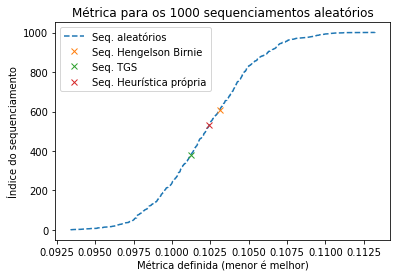

In [39]:
fig1, ax1 = plt.subplots()
ax1.plot(full_sorted_metrics,range(len(full_sorted_metrics)), '--', label='Seq. aleatórios')
ax1.plot(hengelson_metric,hengelson_index, 'x', label='Seq. Hengelson Birnie')
ax1.plot(tgs_metric,tgs_index, 'x', label='Seq. TGS')
ax1.plot(own_metric,own_index, 'x', label='Seq. Heurística própria')
ax1.legend()
plt.ylabel('Índice do sequenciamento')
plt.xlabel('Métrica definida (menor é melhor)')
plt.title('Métrica para os 1000 sequenciamentos aleatórios')

Text(0.5, 1.0, 'Distribuição de $\\lambda$ para as 1000 sequências')

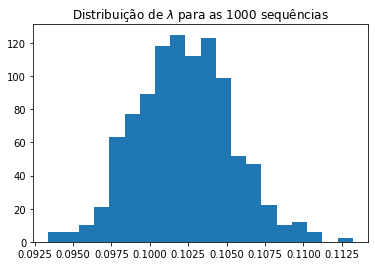

In [42]:
fig2, ax2 = plt.subplots()
ax2.hist(metrics, bins=20)#, density=True)#, cumulative=True)
plt.title('Distribuição de $\lambda$ para as 1000 sequências')

In [38]:
prob_hengelson = (len(full_sorted_metrics)-hengelson_index) / len(full_sorted_metrics)
print('P(HengelsonBirnie) = {:.2%}'.format(prob_hengelson))
prob_tgs = (len(full_sorted_metrics)-tgs_index) / len(full_sorted_metrics)
print('P(TGS) = {:.2%}'.format(prob_tgs))
prob_own = (len(full_sorted_metrics)-own_index) / len(full_sorted_metrics)
print('P(Própria) = {:.2%}'.format(prob_own))

P(HengelsonBirnie) = 39.18%
P(TGS) = 62.21%
P(Própria) = 47.16%


### Definir nova métrica

In [119]:
np.array(tarefasOrder).transpose()

array([[6, 6, 4, ..., 6, 5, 3],
       [3, 5, 7, ..., 1, 7, 2],
       [5, 6, 1, ..., 4, 1, 2],
       ...,
       [4, 7, 6, ..., 7, 6, 5],
       [7, 7, 6, ..., 5, 2, 7],
       [7, 4, 6, ..., 3, 6, 7]])

In [261]:
# Cria o DataFrame com as linhas representando as estações e a colunas os produtos
arrays = [range(len(tarefasOrder)), ['Produto', 'Tempo', 'Desvio']]
index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
newmetric_df = pd.DataFrame(index=range(20), columns=index)

newmetric_df.loc[:,pd.IndexSlice[:, 'Produto']]=np.array(tarefasOrder).transpose()
newmetric_df.head()

e4 = dados[3]

for i in range(1000):
    newmetric_df.loc[:, idx[i, 'Tempo']]=np.array(e4.loc[newmetric_df[i]['Produto']])

for i in range(1000):
    newmetric_df.loc[:, idx[i,'Desvio']] = newmetric_df.loc[:, idx[i,'Tempo']] - pd.Series([722]*20)

In [262]:
desvios_df = newmetric_df.loc[:, idx[:,['Desvio', 'Acumulado']]]
desvios_df.head()

Pos,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
state,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,...,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio
0,-39.6,-39.6,61.7,-77.4,-39.6,-77.4,-77.4,8.2,8.2,61.7,...,-19.9,47.0,-39.6,-77.4,8.2,-19.9,47.0,-39.6,34.3,-77.4
1,-77.4,34.3,8.2,-77.4,34.3,-77.4,61.7,61.7,-19.9,-77.4,...,8.2,-77.4,-77.4,61.7,61.7,47.0,-19.9,47.0,8.2,-19.9
2,34.3,-39.6,47.0,8.2,61.7,8.2,61.7,47.0,34.3,61.7,...,47.0,-77.4,8.2,34.3,61.7,-77.4,-39.6,61.7,47.0,-19.9
3,8.2,47.0,34.3,61.7,-77.4,-19.9,8.2,-77.4,-77.4,-39.6,...,-39.6,8.2,-77.4,-39.6,-77.4,61.7,34.3,61.7,34.3,-39.6
4,34.3,-77.4,61.7,61.7,-19.9,8.2,-19.9,-19.9,34.3,61.7,...,34.3,-19.9,-39.6,61.7,47.0,8.2,34.3,-19.9,34.3,34.3


In [263]:
acumulado = desvios_df.cumsum()
acumulado.head()

Pos,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
state,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,...,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio
0,-39.6,-39.6,61.7,-77.4,-39.6,-77.4,-77.4,8.2,8.2,61.7,...,-19.9,47.0,-39.6,-77.4,8.2,-19.9,47.0,-39.6,34.3,-77.4
1,-117.0,-5.3,69.9,-154.8,-5.3,-154.8,-15.7,69.9,-11.7,-15.7,...,-11.7,-30.4,-117.0,-15.7,69.9,27.1,27.1,7.4,42.5,-97.3
2,-82.7,-44.9,116.9,-146.6,56.4,-146.6,46.0,116.9,22.6,46.0,...,35.3,-107.8,-108.8,18.6,131.6,-50.3,-12.5,69.1,89.5,-117.2
3,-74.5,2.1,151.2,-84.9,-21.0,-166.5,54.2,39.5,-54.8,6.4,...,-4.3,-99.6,-186.2,-21.0,54.2,11.4,21.8,130.8,123.8,-156.8
4,-40.2,-75.3,212.9,-23.2,-40.9,-158.3,34.3,19.6,-20.5,68.1,...,30.0,-119.5,-225.8,40.7,101.2,19.6,56.1,110.9,158.1,-122.5


In [292]:
# Cálculos feitos no excel
abs_mean_hengelson = 9.11 
abs_mean_tgs = 14.59
abs_mean_own = 59.10

random_seq = np.array(acumulado.mean(axis=0).abs())
full_random_seq = np.append(random_seq, (abs_mean_hengelson, abs_mean_own, abs_mean_tgs))
full_random_seq_sorted = np.sort(full_random_seq)

hengelson_abs_index = full_random_seq_sorted.tolist().index(abs_mean_hengelson)  
tgs_abs_index = full_random_seq_sorted.tolist().index(abs_mean_tgs) 
own_abs_index = full_random_seq_sorted.tolist().index(abs_mean_own) 

In [291]:
full_random_seq_sorted.tolist().index(abs_mean_tgs) 

173

Text(0.5, 1.0, 'Média absoluta dos desvios em relação à média')

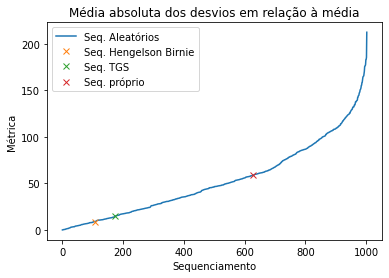

In [299]:
fig3, ax3 = plt.subplots()
ax3.plot(range(len(full_random_seq_sorted)), full_random_seq_sorted, label = 'Seq. Aleatórios')
ax3.plot(hengelson_abs_index, abs_mean_hengelson, 'x', label = 'Seq. Hengelson Birnie')
ax3.plot(tgs_abs_index, abs_mean_tgs, 'x', label = 'Seq. TGS')
ax3.plot(own_abs_index, abs_mean_own, 'x', label = 'Seq. próprio')
plt.legend()
plt.xlabel('Sequenciamento')
plt.ylabel('Métrica')
plt.title('Média absoluta dos desvios em relação à média')

Text(0.5, 1.0, 'Histograma')

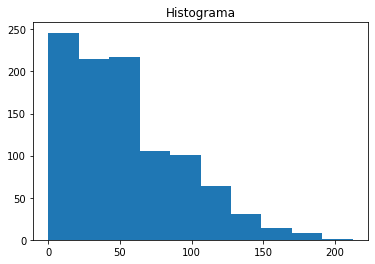

In [307]:
fig4, ax4 = plt.subplots()
ax4.hist(full_random_seq)
plt.title('Histograma')

In [310]:
prob_hengelson2 = (len(full_random_seq_sorted)-hengelson_abs_index) / len(full_random_seq_sorted)
print('P(HengelsonBirnie) = {:.2%}'.format(prob_hengelson2))
prob_tgs2 = (len(full_random_seq_sorted)-tgs_abs_index) / len(full_random_seq_sorted)
print('P(TGS) = {:.2%}'.format(prob_tgs2))
prob_own2 = (len(full_sorted_metrics)-own_abs_index) / len(full_random_seq_sorted)
print('P(Própria) = {:.2%}'.format(prob_own2))

P(HengelsonBirnie) = 89.33%
P(TGS) = 82.75%
P(Própria) = 37.29%
